In [298]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [299]:
from sklearn import model_selection
from sklearn import feature_extraction
from sklearn import linear_model
from sklearn import svm
from sklearn import neighbors
from sklearn import metrics

In [300]:
from nltk.corpus import stopwords

Ucitani su podaci preko excell tabele koja je skinuta sa "https://www.kaggle.com/datasets/milobele/sentiment140-dataset-1600000-tweets" web stranice.

In [301]:
data = pd.read_csv('sentiment140/training.1600000.processed.noemoticon.csv', encoding='latin-1', header=None, names=['Sentiment', 'Tweet ID', 'Date', 'Query', 'Username', 'Tweet'])

In [302]:
data.head(2)

,Sentiment,Tweet ID,Date,Query,Username,Tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...


Sentiment atribut oznacava da li je twettt pozitivan ili negativan. Vrednosti oznacene sa 0 odgovaraju negativnom sentimentu, 2 odgovara neutralnom sentimentu, dok 4 odgovara pozitivnom sentimentu

In [303]:
sentiments = data['Sentiment'].value_counts().keys()
sentiments

Index([0, 4], dtype='int64', name='Sentiment')

In [304]:
np.unique(sentiments)

array([0, 4], dtype=int64)

U ovom skupu podataka su uklonjeni svi neutralni tweetovi, sto pokazuje np.unique() funkcija, shodno sa time je pokazan histogram pozitivnih i negativnih tweetova.

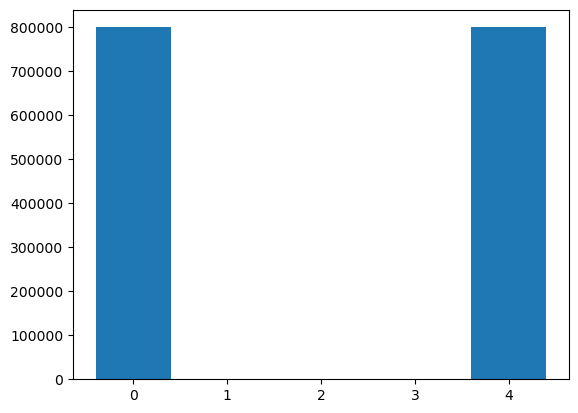

In [305]:
plt.bar(data['Sentiment'].value_counts().keys(), data['Sentiment'].value_counts().values)
plt.show()

Kao sto mozemo da primetimo, uklonjeni su svi neutralni sentimenti, sa tim na umu su remapirane ciljne vrednosti u 0 (negativan) i 1 (pozitivan)

In [306]:
def Sentiment_remap(x):
    if x == 0:
        return 0
    else:
        return 1

In [307]:
data['Sentiment'] = data['Sentiment'].apply(Sentiment_remap)

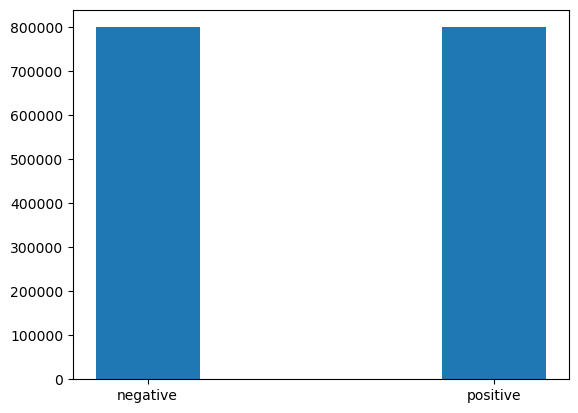

In [308]:
plt.bar(data['Sentiment'].value_counts().keys(),data['Sentiment'].value_counts().values, width = 0.3)
plt.xticks([0,1], labels=['negative', 'positive'])
plt.show()

Ciljna promenljiva nam je sam sentiment tweeta, dok nam je sam tweet atribut. ID tweeta, datum postavljanja tweeta kao i ostali atributi sem samog tweeta nemaju korelaciju sa sentimentom. 
U ovom slucaju nisu uklonjeni korisnicki nalozi u samom tweetu, kako bi se videlo da li oni uopste uticu na sentiment.

In [309]:
x = data['Tweet']
y = data['Sentiment']

In [310]:
print("x shape: ", x.shape)
print("y shape: ", y.shape)

x shape:  (1600000,)
y shape:  (1600000,)


Napravljen su skupovi za validaciju gde su testirani su hiperparametri za min_df i max_df kako bi se pronasli najbolji isti, uradjeno je u vise iteracije i najbolji skupovi za treniranje su sledeci

In [311]:
x_train_validation, x_test, y_train_validation, y_test = model_selection.train_test_split(x,y,train_size=0.1,test_size=0.05, stratify=y, random_state=7)

In [312]:
x_train, x_validation, y_train, y_validation = model_selection.train_test_split(x_train_validation, y_train_validation, train_size=0.8, stratify=y_train_validation, random_state=7)

In [313]:
min_freq = [28,29,30,31,32]
max_freq = [3600,4000,5000,6000,7000]

In [314]:
best_min_freq = None
best_max_freq = None
best_score = float('-inf')

for minfreq in min_freq:
    for maxfreq in max_freq:
        model = linear_model.LinearRegression()

        tweet_count_vectorizer = feature_extraction.text.CountVectorizer(min_df = minfreq, max_df = maxfreq, stop_words=stopwords.words('english'))
        tweet_count_vectorizer.fit(x_train)

        x_train_vectorized = tweet_count_vectorizer.transform(x_train)
        x_test_vectorized = tweet_count_vectorizer.transform(x_validation)
        
        model.fit(x_train_vectorized,y_train)
        score = model.score(x_test_vectorized, y_validation)
        
        if score > best_score:
            best_score = score
            best_min_freq = minfreq
            best_max_freq = maxfreq
            
print('best_score = {}, best_min_freq = {}, best_max_freq = {}'.format(best_score, best_min_freq, best_max_freq))
        
        

best_score = 0.28547993214079037, best_min_freq = 32, best_max_freq = 7000


Napravljena je vektorska reprezentacija teksta metodom Vreca reci sa najboljim hiperparametrima.

In [315]:
tweet_count_vectorizer = feature_extraction.text.CountVectorizer(min_df=best_min_freq, max_df=best_max_freq, stop_words=stopwords.words('english'))

In [316]:
tweet_count_vectorizer.fit(x_train)

CountVectorizer(max_df=7000, min_df=32,
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...])

In [317]:
feature_names = tweet_count_vectorizer.get_feature_names_out()

In [318]:
len(feature_names)

3131

In [319]:
x_train_vectorized = tweet_count_vectorizer.transform(x_train)
x_test_vectorized = tweet_count_vectorizer.transform(x_test)

# Model 1 - logisticka regresija

In [320]:
model1 = linear_model.LogisticRegression()

In [321]:
model1.fit(x_train_vectorized,y_train)

D:\Users\mata2\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Tacnost modela na trening i test skupu

In [322]:
model1_skor_train = model1.score(x_train_vectorized, y_train)
model1_skor_test = model1.score(x_test_vectorized, y_test)

In [323]:
print("skor na podacima za treniranje: ", model1_skor_train)
print('skor na podacima za testiranje: ', model1_skor_test)

skor na podacima za treniranje:  0.771015625
skor na podacima za testiranje:  0.7559375


### Matrica konfuzije - logisticka regresija

In [324]:
y_predicted_lr = model1.predict(x_test_vectorized)

In [325]:
matrica_konfuzije_lr = metrics.confusion_matrix(y_test, y_predicted_lr)
matrica_konfuzije_lr

array([[28759, 11241],
       [ 8284, 31716]], dtype=int64)

In [326]:
metrics.f1_score(y_test, y_predicted_lr)

0.7646371011487879

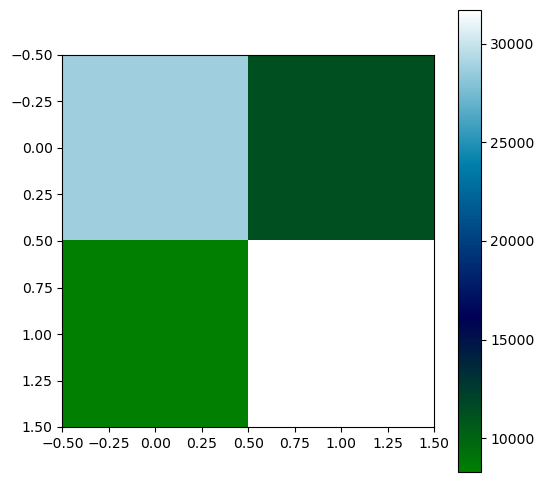

In [327]:
plt.figure(figsize=(6, 6))
plt.imshow(matrica_konfuzije_lr, cmap='ocean')
plt.colorbar()
plt.show()

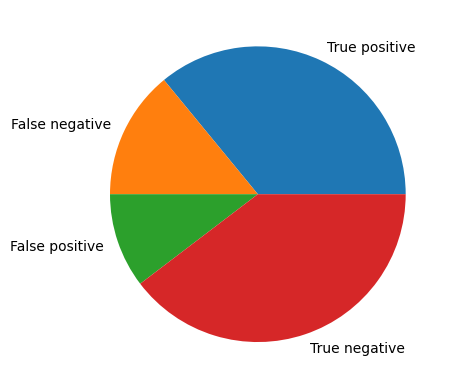

In [328]:
plt.pie(matrica_konfuzije_lr.ravel(), labels=['True positive', 'False negative','False positive', 'True negative'])
plt.show()

# MODEL 2 - linearni SVM

In [329]:
model2 = svm.LinearSVC()

In [330]:
model2.fit(x_train_vectorized, y_train)

D:\Users\mata2\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [331]:
model2_skor_train = model2.score(x_train_vectorized, y_train)
model2_skor_test = model2.score(x_test_vectorized, y_test)

In [332]:
print("skor na podacima za treniranje: ", model2_skor_train)
print('skor na podacima za testiranje: ', model2_skor_test)

skor na podacima za treniranje:  0.7701328125
skor na podacima za testiranje:  0.7549125


In [333]:
y_pred_svm = model2.predict(x_test_vectorized)
matrica_konfuzije_svm = metrics.confusion_matrix(y_test, y_pred_svm)
matrica_konfuzije_svm

array([[28419, 11581],
       [ 8026, 31974]], dtype=int64)

### Matrica konfuzije - linearni SVM

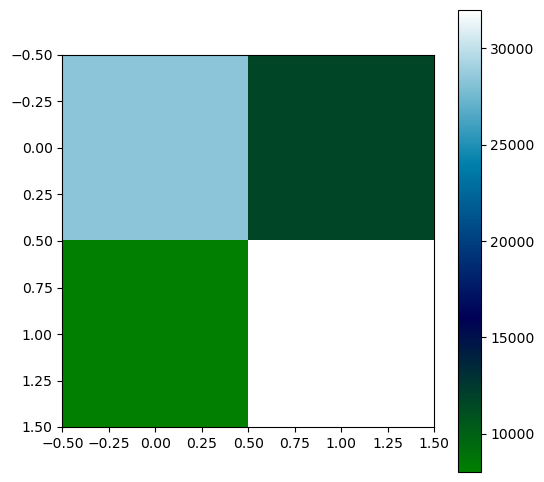

In [334]:
plt.figure(figsize=(6, 6))
plt.imshow(matrica_konfuzije_svm, cmap='ocean')
plt.colorbar()
plt.show()

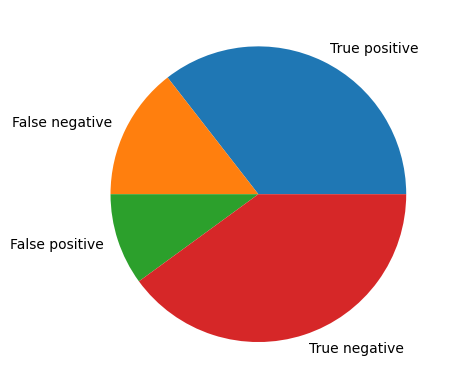

In [335]:
plt.pie(matrica_konfuzije_svm.ravel(), labels=['True positive', 'False negative','False positive', 'True negative'])
plt.show()

# MODEL 3 - k najblizih suseda

Testirani su hiperparametri za najbolji broj suseda. K najblizih suseda je radjen sa manjim % podataka zbog vremenskih poteskoca pri treniranju modela

In [336]:
num_neighbors = [6,8,10,12,15]

In [337]:
x_train_vectorized = tweet_count_vectorizer.transform(x_train)
x_validation_vectorized = tweet_count_vectorizer.transform(x_validation)

In [338]:
best_score = float('-inf')
best_neigh = None

for neigh in num_neighbors:
    model = neighbors.KNeighborsClassifier(n_neighbors=neigh)
    model.fit(x_train_vectorized, y_train)
    score = model.score(x_validation_vectorized, y_validation)
        
    if score > best_score:
        best_score = score
        best_neigh = neigh
print('best score = {}, best neighbor num = {}'.format(best_score, best_neigh))

best score = 0.67371875, best neighbor num = 12


Napravljen je model sa najboljim hiperparametrima

In [339]:
model3 = neighbors.KNeighborsClassifier(n_neighbors=best_neigh)

In [340]:
model3.fit(x_train_vectorized, y_train)

KNeighborsClassifier(n_neighbors=12)

In [341]:
model3_skor_train = model3.score(x_train_vectorized, y_train)
model3_skor_test = model3.score(x_test_vectorized, y_test)

In [342]:
print("skor na podacima za treniranje: ", model3_skor_train)
print('skor na podacima za testiranje: ', model3_skor_test)

skor na podacima za treniranje:  0.7318046875
skor na podacima za testiranje:  0.675375


In [343]:
y_pred_kneigh = model3.predict(x_test_vectorized)
matrica_konfuzije_kneigh = metrics.confusion_matrix(y_test, y_pred_kneigh)
matrica_konfuzije_kneigh

array([[25473, 14527],
       [11443, 28557]], dtype=int64)

### Matrica konfuzije - k najblizih suseda

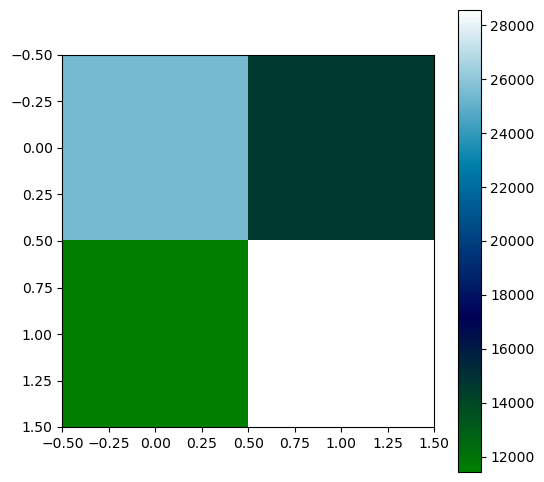

In [344]:
plt.figure(figsize=(6, 6))
plt.imshow(matrica_konfuzije_kneigh, cmap='ocean')
plt.colorbar()
plt.show()

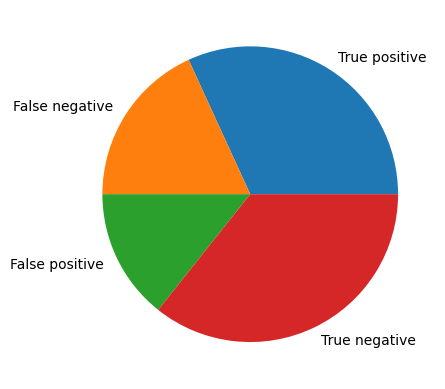

In [345]:
plt.pie(matrica_konfuzije_kneigh.ravel(), labels=['True positive', 'False negative','False positive', 'True negative'])
plt.show()

In [346]:
rezultati = [[model1_skor_train, model1_skor_test],[model2_skor_train,model2_skor_test],[model3_skor_train,model3_skor_test]]
pd.DataFrame(rezultati, columns=["score na treniranju", "score na testu"], index = ['Log Reg','SVM','K-neigh'])

,score na treniranju,score na testu
Log Reg,0.771016,0.755938
SVM,0.770133,0.754912
K-neigh,0.731805,0.675375
